In [58]:
from sklearn.datasets import make_regression
import numpy as np

In [60]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

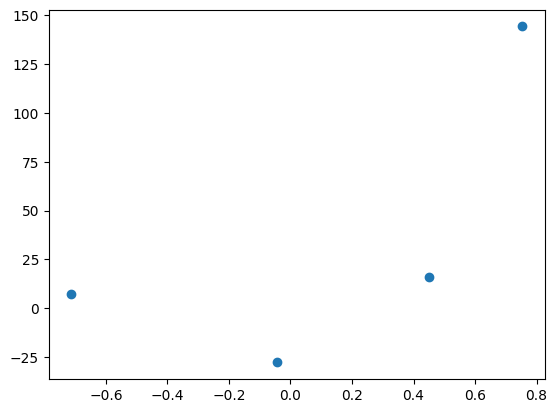

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

# OLS (Ordinary Least Square)

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [67]:
lr.fit(X, y)

LinearRegression()

In [69]:
m = lr.coef_
m

array([78.35063668])

In [71]:
b = lr.intercept_
b

26.15963284313262

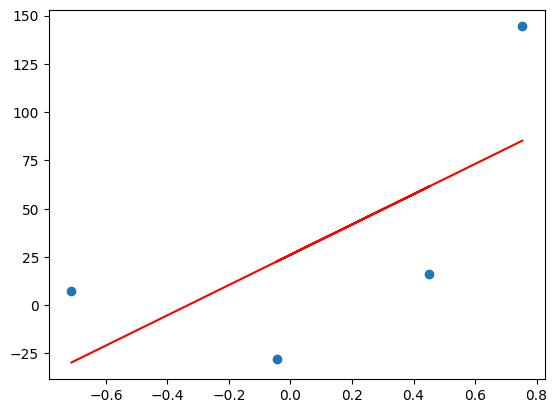

In [73]:
y_pred1 = lr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred1, color="Red")

# Gradient Descent

In [76]:
x = X
m = 78.35
b = 100
yi = y
print(type(m*x+b), (m*x+b), (m*x+b).shape)
y_pred2 = (m*x + b).reshape(4)

# y_hat = (m * x.ravel() + b)
slope_loss = -2*np.sum(yi - y_pred2)
print(y_pred2, type(y_pred2), y_pred2.shape)
print(slope_loss)

<class 'numpy.ndarray'> [[ 44.18419163]
 [135.39949674]
 [ 96.51318381]
 [159.05759577]] (4, 1)
[ 44.18419163 135.39949674  96.51318381 159.05759577] <class 'numpy.ndarray'> (4,)
590.7223659179078


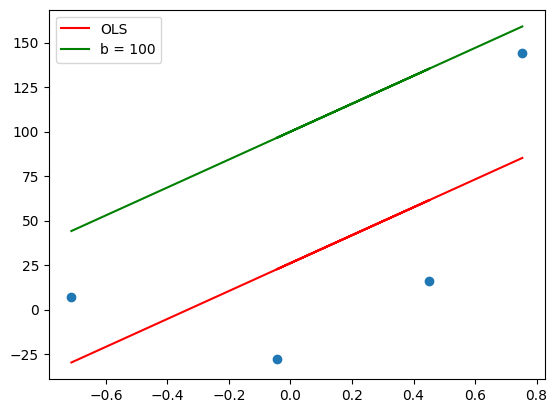

In [78]:
plt.scatter(X, y)
plt.plot(X, y_pred1, color="Red", label="OLS")
plt.plot(X, y_pred, color="green", label = "b = 100")
plt.legend()
plt.show()

In [80]:
# Lets take leraning rate

learning_rate = 0.1
step_size = learning_rate * slope_loss
step_size

59.072236591790784

In [82]:
# Now calculate the new intercept
b = b - step_size
b

40.927763408209216

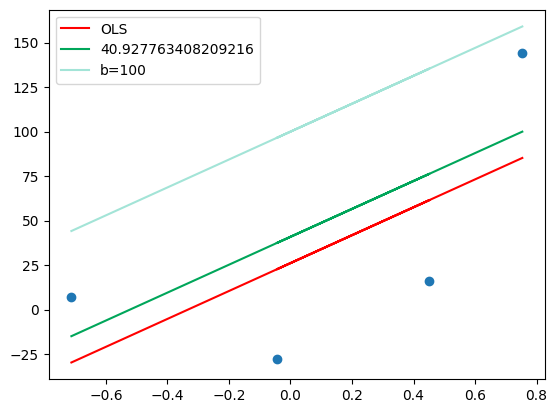

In [88]:
y_pred3 = (m*x + b).reshape(4)
plt.scatter(X, y)
plt.plot(X, y_pred1, color="red", label="OLS")
plt.plot(X, y_pred3, color="#00a65a", label = "{}".format(b))
plt.plot(X, y_pred2, color="#A3E4D7", label = "b=100")
plt.legend()
plt.show()

In [90]:
y_pred1

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [105]:
# import pandas as pd
# df = pd.read_csv("color_names.csv")
# color_codes = df.iloc[:,1]
# print(type(color_codes))

<class 'pandas.core.series.Series'>


# Using Loop

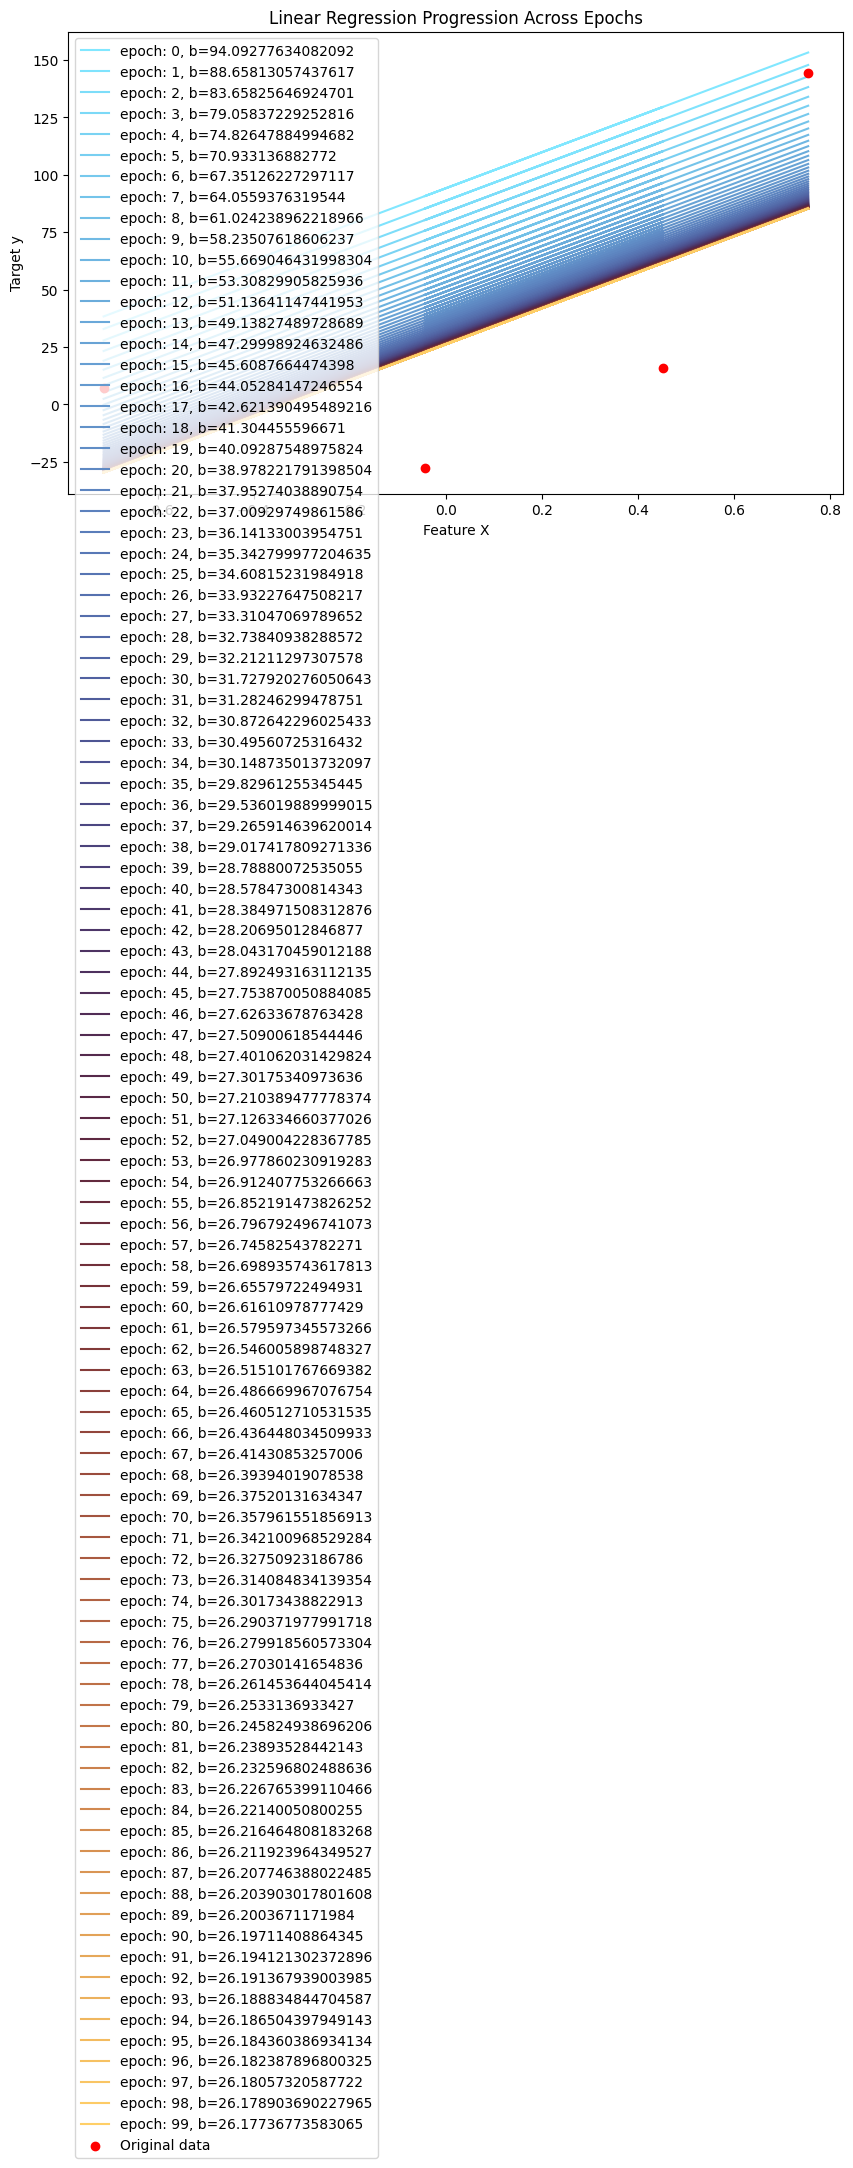

In [180]:
import time
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

b = 100
m = 78.35
lr = 0.01

epochs = 100
colors = plt.cm.managua_r(np.linspace(0, 1, epochs))

plt.figure(figsize=(10, 6))

for i in range(epochs):
    slope_loss = -2 * np.sum(y - m * X.ravel() - b)
    b = b - (lr * slope_loss)
    
    y_pred = m * X.ravel() + b
    
    plt.plot(X, y_pred, color=colors[i], label="epoch: {}, b={}".format(i, b))
        
plt.scatter(X, y, color="red", label="Original data", zorder=5)
plt.legend(loc='best')
plt.title("Linear Regression Progression Across Epochs")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()
    

# Gradient Descent Regresser Class

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [53]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

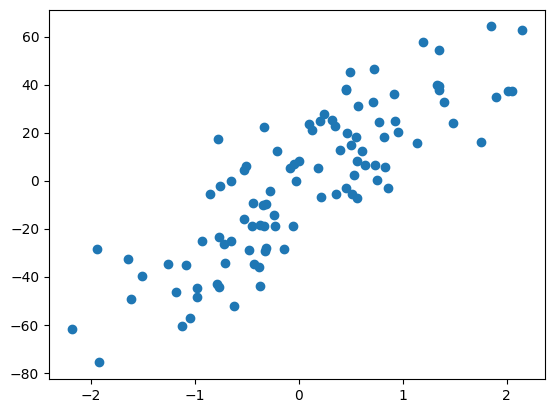

In [55]:
plt.scatter(X, y)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [61]:
lr = LinearRegression() 

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [67]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6345158782661012

# My Own Regresser Class

In [134]:
class GDRegresser:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 100
        self.b = -120

    def fit(self, X, y):
        for i in range(self.epochs):
            slope_loss_b = -2 * sum(y - self.m * X.ravel() - self.b)
            slope_loss_m = -2 * sum((y - self.m * X.ravel() - self.b)*X.ravel())       
            
            self.b = self.b - (self.learning_rate * slope_loss_b)
            self.m = self.m - (self.learning_rate * slope_loss_m)

        print(self.m, self.b)

    def predict(self, X):
        return self.m * X.ravel() + self.b

In [170]:
gd = GDRegresser(0.001, 70)

In [172]:
gd.fit(X_train,y_train)

28.12742738603652 -2.272149769092331


In [140]:
y_pred = gd.predict(X_test)
r2_score(y_test, y_pred)

0.6343842836315579